# Ch.09 - Support Vector Machines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

### 9.6.1 - Support Vector Classifier

* 참고자료
    * [RF 등고선 그리기](https://rfriend.tistory.com/547)
    * [XOR 문제를 비선형 SVM을 통해 해결하기](https://datascienceschool.net/view-notebook/69278a5de79449019ad1f51a614ef87c/)

In [57]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [46]:
# 난수 생성
np.random.seed(37)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

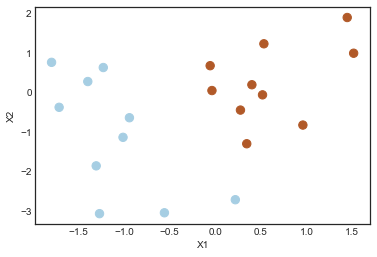

In [47]:
# 생성된 난수에 조금 편차를 주고 plot
X[y == -1] = X[y == -1] - 1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

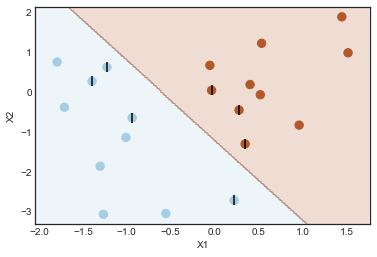

Number of support vectors:  7


In [58]:
# svc학습
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)
# 최소값 범위와 최대값 범위 사이의 격자간격 만큼의 데이터를 통해 경계를 확인
plot_svc(svc, X, y)

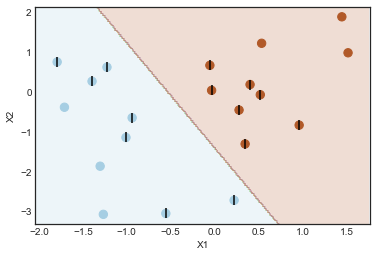

Number of support vectors:  14


In [61]:
# C값을 줄이면 margin이 커지는것을 확인할 수 있다.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [67]:
# 최적의 C값을 찾아보기 --> C가 작다는것은 오차를 많이 허용한다는뜻
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'C': 0.1}

In [81]:
# test data를 사용해 C가 0.1인 학습된 모델을 살펴보자
np.random.seed(99)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)

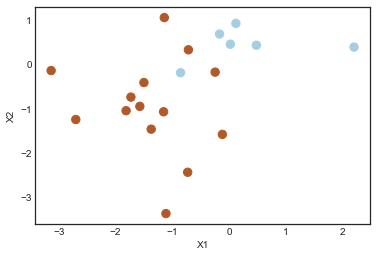

In [82]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [83]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)
# 많이 틀리는것을 확인할 수 있다.

,-1,1
-1,1,5
1,13,1


In [84]:
# C를 줄이면 더 많이 맞추게될까??
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# 똑같은 confusion matrix인것을 확인할 수 있다.

,-1,1
-1,1,5
1,13,1


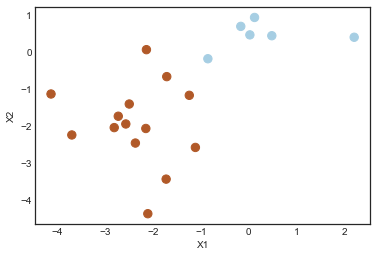

In [85]:
# 조금 데이터를 쉬프트 시켜서 살펴보자.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

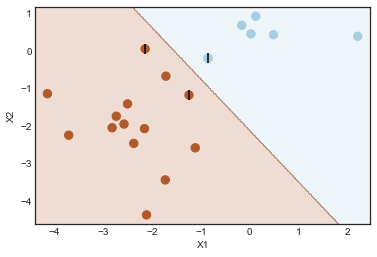

Number of support vectors:  3


In [92]:
svc4 = SVC(C=10, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)
# 데이터를 쉬프트시켜보니 큰 C값을 가지고 따라서 margin이 적어도 잘 분리가 된다.

### 9.6.2 - Support Vector Machine

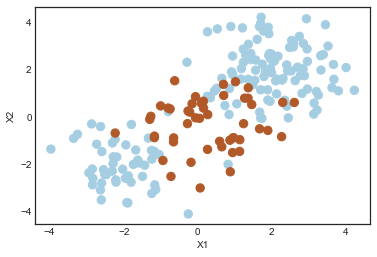

In [94]:
np.random.seed(37)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [97]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) # RBF(Radial Basis Function) 또는 가우시안 커널(Gaussian Kernel)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

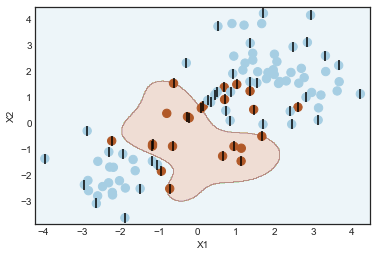

Number of support vectors:  56


In [98]:
plot_svc(svm, X_train, y_train)

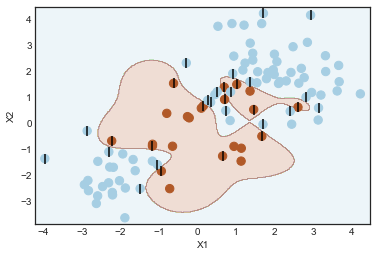

Number of support vectors:  31


In [100]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_train, y_train)
# C값을 키우니까 오차허용이 줄어들고 확연히 구분되는것을 볼 수 있다.

In [101]:
# 최적의 C값 찾기
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\zone\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 2}

In [103]:
# C가 1일때의 SVM을 통해 테스트 데이터 정확도를 확인해보면 86%가 나오는것을 볼 수 있다.
clf.best_estimator_.score(X_test, y_test)

0.86

### 9.6.3 - ROC Curves

In [120]:
import scikitplot as skplt

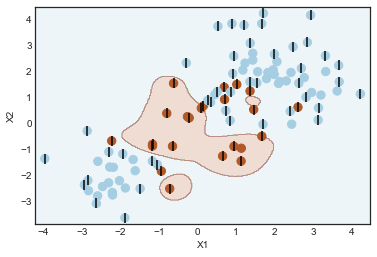

Number of support vectors:  64


In [133]:
svm3 = SVC(C=1, kernel='rbf', gamma=2, probability=True)
svm3.fit(X_train, y_train)
plot_svc(svm3, X_train, y_train)

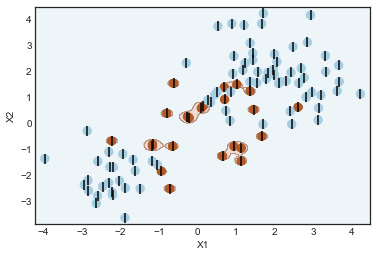

Number of support vectors:  98


In [139]:
# 감마값을 크게해서 완전히 오버피팅된 모습
svm4 = SVC(C=1, kernel='rbf', gamma=20, probability=True)
svm4.fit(X_train, y_train)
plot_svc(svm4, X_train, y_train)

C:\Users\zone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


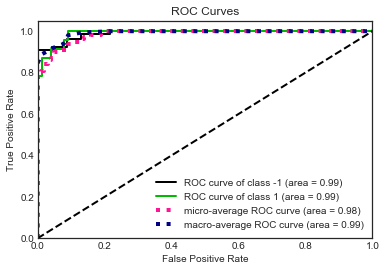

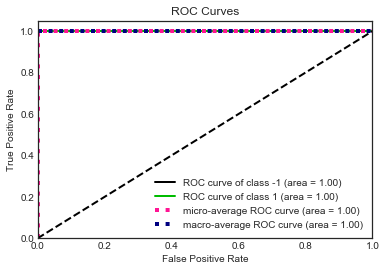

In [141]:
prob1 = svm3.predict_proba(X_train)
prob2 = svm4.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, prob1)
skplt.metrics.plot_roc_curve(y_train, prob2)
plt.show()
# 오버피팅된 svm4가 train데이터는 더 잘 학습한 것처럼 보인다.

C:\Users\zone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


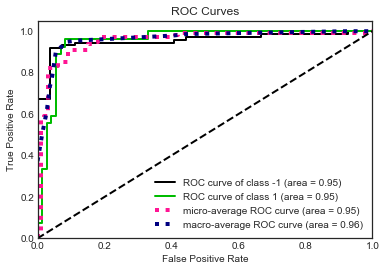

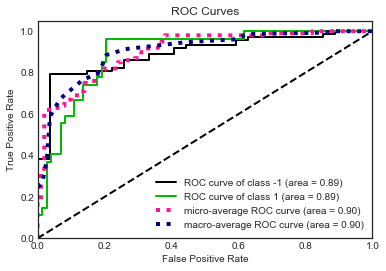

In [142]:
prob3 = svm3.predict_proba(X_test)
prob4 = svm4.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, prob3)
skplt.metrics.plot_roc_curve(y_test, prob4)
plt.show()
# 하지만 독립된 테스트 데이터에 대해 살펴보면 오버피팅된 SVM4가 SVM3보다 정확도가 떨어지는 것을 볼 수 있다.

### 9.6.4 - SVM with Multiple Classes

In [147]:
# 클래스 하나를 늘려서 총 3개의 클래스를 갖는 경우를 살펴보자.
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)]) # 기존 y에 0 클래스 추가
XX[yy ==0] = XX[yy == 0] +4

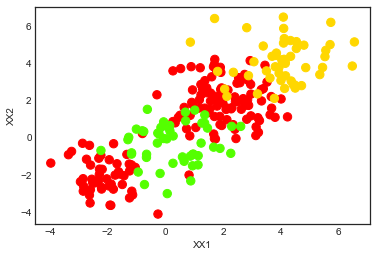

In [148]:
plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

C:\Users\zone\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


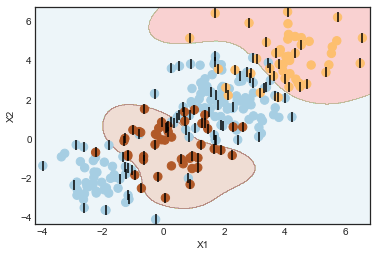

Number of support vectors:  121


In [149]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

### 9.6.5 - Application to Gene Expression Data

In [150]:
X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [153]:
# y_train 분포 확인
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [154]:
# y_test 분포 확인
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [158]:
svc = SVC(kernel='linear', C=10)
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [159]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
# train 데이터에 모두 맞는것을 볼 수 있다.

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [160]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
# 테스트 데이터에도 모두 맞는것을 볼 수 있다.

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
